# Exploring data
So you've just got a brand new dataset and are itching to start exploring it. But where do you begin, and how can you be sure your dataset is clean? This chapter will introduce you to the world of data cleaning in Python! You'll learn how to explore your data with an eye for diagnosing issues such as outliers, missing values, and duplicate rows.

# 1. Diagnose data for cleaning
## 1.1 Loading and viewing your data
In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the [NYC Open Data](http://opendata.cityofnewyork.us/) portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the `.head()` and `.tail()` methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The `.shape` and `.columns` attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, `df_subset`, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

### Instructions:
* Import `pandas` as `pd`.
* Read `'dob_job_application_filings_subset.csv'` into a DataFrame called `df`.
* Print the head and tail of `df`.
* Print the shape of `df` and its columns. Note: `.shape` and `.columns` are _attributes_, not _methods_, so you don't need to follow these with parentheses `()`.
* Hit 'Submit Answer' to view the results! Notice the suspicious number of `0` values. Perhaps these represent missing data.

In [1]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('_datasets/dob_job_application_filings_subset.csv', low_memory=False)

# Print the head of df
print(df.head())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

In [2]:
# Print the tail of df
print(df.tail())

           Job #  Doc #        Borough       House #  \
12841  520143988      1  STATEN ISLAND  8              
12842  121613833      1      MANHATTAN  724            
12843  121681260      1      MANHATTAN  350            
12844  320771704      1       BROOKLYN  499            
12845  520143951      1  STATEN ISLAND  1755           

                            Street Name  Block  Lot    Bin # Job Type  \
12841  NOEL STREET                        5382   20  5069722       A2   
12842  10 AVENUE                          1059    4  1082503       A2   
12843  MANHATTAN AVE.                     1848   31  1055849       A2   
12844  UNION STREET                        431   43  3007185       A2   
12845  RICHMOND ROAD                       887   28  5022931       A2   

      Job Status           ...                         Owner's Last Name  \
12841          D           ...            MALITO                           
12842          D           ...            CROMAN                        

In [3]:
# Print the shape of df
print(df.shape)

(12846, 82)


In [4]:
# Print the columns of df
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [6]:
df_subset = df[['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 
               'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories', 'Proposed No. of Stories', 
               'Existing Height', 'Proposed Height']]

# Print the head and tail of df_subset
print(df_subset.head())

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

In [7]:
print(df_subset.tail())

           Job #  Doc #        Borough Initial Cost Total Est. Fee  \
12841  520143988      1  STATEN ISLAND    $30700.00        $448.62   
12842  121613833      1      MANHATTAN    $62000.00        $852.10   
12843  121681260      1      MANHATTAN   $166000.00       $1923.30   
12844  320771704      1       BROOKLYN    $65000.00        $883.00   
12845  520143951      1  STATEN ISLAND     $9500.00        $316.50   

       Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
12841                  1490                  1782                     206   
12842                     0                     0                       0   
12843                     0                     0                       0   
12844                     0                     0                       0   
12845                     0                     0                       0   

       Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
12841                0                   

In addition to the suspicious number of `0` values, which may represent missing data, notice that the columns that contain monetary values - `'Initial Cost'` and `'Total Est. Fee'` - have a dollar sign in the beginning. These columns may be coded as strings instead of numeric values. You will check this in the next exercise.

## 1.2 Further diagnosis
In the previous exercise, you identified some potentially unclean or missing data. Now, you'll continue to diagnose your data with the very useful `.info()` method.

The `.info()` method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column, and the data type stored in each column. This is the kind of information that will allow you to confirm whether the `'Initial Cost'` and `'Total Est. Fee'` columns are numeric or strings. From the results, you'll also be able to see whether or not all columns have complete data in them.

The full DataFrame `df` and the subset DataFrame `df_subset` have been pre-loaded. Your task is to use the `.info()` method on these and analyze the results.

### Instructions:
* Print the `info` of `df`.
* Print the `info` of the subset dataframe, `df_subset`.

In [8]:
# Print the info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

In [9]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                      12846 non-null int64
Doc #                      12846 non-null int64
Borough                    12846 non-null object
Initial Cost               12846 non-null object
Total Est. Fee             12846 non-null object
Existing Zoning Sqft       12846 non-null int64
Proposed Zoning Sqft       12846 non-null int64
Enlargement SQ Footage     12846 non-null int64
Street Frontage            12846 non-null int64
ExistingNo. of Stories     12846 non-null int64
Proposed No. of Stories    12846 non-null int64
Existing Height            12846 non-null int64
Proposed Height            12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.1+ MB
None


Notice that the columns `'Initial Cost'` and `'Total Est. Fee'` are of type `object`. The currency sign in the beginning of each value in these columns needs to be removed, and the columns need to be converted to numeric. In the full DataFrame, note that there are a lot of missing values. You saw in the previous exercise that there are also a lot of `0` values. Given the amount of data that is missing in the full dataset, it's highly likely that these `0` values represent missing data.

# 2. Exploratory data analysis
## 2.1 Calculating summary statistics
You'll now use the `.describe()` method to calculate summary statistics of your data.

In this exercise, the columns `'Initial Cost'` and `'Total Est. Fee'` have been cleaned up for you. That is, the dollar sign has been removed and they have been converted into two new numeric columns: `initial_cost` and `total_est_fee`. You'll learn how to do this yourself in later chapters. It's also worth noting that some columns such as `Job #` are encoded as numeric columns, but it does not make sense to compute summary statistics for such columns.

This cleaned DataFrame has been pre-loaded as `df`. Your job is to use the `.describe()` method on it in the IPython Shell and select the statement below that is __False__.

### Possible Answers:
1. The mean of 'Proposed No. of Stories' is 8.144325.
2. The standard deviation of 'Existing Height' is 146.917360.
3. There are 12846 entries in the DataFrame.
4. The standard deviation of 'Street Frontage' is 11.874080.
5. The maximum of 'Proposed Height' is 4200.

In [10]:
dat = '_datasets/dob_job_application_filings_subset.csv'
df_full = pd.read_csv(dat, low_memory=False)
df_full['initial_cost'] = df_full['Initial Cost'].str[1:].astype(float)
df_full['total_est_fee'] = df_full['Total Est. Fee'].str[1:].astype(float)

df = df_full[['Job #', 'Doc #', 'Borough', 'initial_cost', 'total_est_fee', 'Existing Zoning Sqft', 
              'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories', 
              'Proposed No. of Stories', 'Existing Height', 'Proposed Height']]

In [11]:
df.describe()

Job #         Doc #  initial_cost  total_est_fee  \
count  1.284600e+04  12846.000000  1.284600e+04   1.284600e+04   
mean   2.426788e+08      1.162930  1.803139e+05   2.894909e+03   
std    1.312507e+08      0.514937  7.961524e+06   1.213534e+05   
min    1.036438e+08      1.000000  0.000000e+00   0.000000e+00   
25%    1.216206e+08      1.000000  0.000000e+00   2.250000e+02   
50%    2.202645e+08      1.000000  1.597500e+04   4.195000e+02   
75%    3.208652e+08      1.000000  6.790500e+04   9.297000e+02   
max    5.400246e+08      9.000000  9.003000e+08   1.014000e+07   

       Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
count          1.284600e+04          1.284600e+04            12846.000000   
mean           1.439973e+03          2.007286e+03               46.101432   
std            3.860757e+04          4.081570e+04              784.216569   
min            0.000000e+00          0.000000e+00                0.000000   
25%            0.000000e+00          0.000000e+00                0.000000   
50%            0.000000e+00          0.000000e+00                0.000000   
75%            0.000000e+00          0.000000e+00                0.000000   
max            2.873107e+06          2.873107e+06            50384.000000   

       Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
count     12846.000000            12846.000000             12846.000000   
mean          3.069360                8.062354                 8.144325   
std          37.246034               11.874080                11.843492   
min           0.000000                0.000000                 0.000000   
25%           0.000000                1.000000                 2.000000   
50%           0.000000                4.000000                 4.000000   
75%           0.000000                9.000000                 9.000000   
max        3160.000000              102.000000               102.000000   

       Existing Height  Proposed Height  
count     12846.000000     12846.000000  
mean         94.022809        94.917562  
std         146.917360       146.580666  
min           0.000000         0.000000  
25%          20.000000        21.000000  
50%          45.000000        45.000000  
75%         105.000000       107.000000  
max        4200.000000      4200.000000

__Answer:__ The standard deviation of `'Street Frontage'` is actually `37.246034`.

## 2.2 Frequency counts for categorical data
As you've seen, `.describe()` can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the `.value_counts()` method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called `dropna` which is `True` by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the `dropna` column to `False` so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the `'Borough'`, `'State'`, and `'Site Fill'` columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the `'State'` column from `NY`, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.

### Instructions:
* Print the value counts for:
    * The `'Borough'` column.
    * The `'State'` column.
    * The `'Site Fill'` column.

In [12]:
# Read the file into a DataFrame: df
df = pd.read_csv('_datasets/dob_job_application_filings_subset.csv', low_memory=False)

In [13]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64


In [14]:
# Print the value_counts for 'State'
print(df.State.value_counts(dropna=False))

NY    12391
NJ      241
PA       38
CA       20
OH       19
IL       17
FL       17
CT       16
TX       13
TN       10
MD        7
DC        7
KS        6
MA        6
GA        6
VA        5
CO        4
MN        3
AZ        3
WI        3
SC        3
UT        2
NC        2
RI        2
MI        1
NM        1
VT        1
WA        1
IN        1
Name: State, dtype: int64


In [15]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


Notice how not all values in the `'State'` column are `NY`. This is an interesting find, as this data is supposed to consist of applications filed in NYC. Curiously, all the `'Borough'` values are correct. A good start as to why this may be the case would be to find and look at the codebook for this dataset. Also, for the `'Site Fill'` column, you may or may not need to recode the `NOT APPLICABLE` values to `NaN` in your final analysis.

# 3. Visual exploratory data analysis
## 3.1 Visualizing single variables with histograms
Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is `'Existing Zoning Sqft'`.

The `.plot()` method allows you to create a plot of each column of a DataFrame. The `kind` parameter allows you to specify the type of plot to use - `kind='hist'`, for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the `'Existing Zoning Sqft'` column using the `.describe()` method. You'll notice that there are extremely large differences between the `min` and `max` values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments `logx=True` or `logy=True` can be passed in to `.plot()` depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

### Instructions:
* Import `matplotlib.pyplot` as `plt`.
* Create a histogram of the `'Existing Zoning Sqft'` column. Rotate the axis labels by 70 degrees and use a log scale for both axes.
* Display the histogram using `plt.show()`.

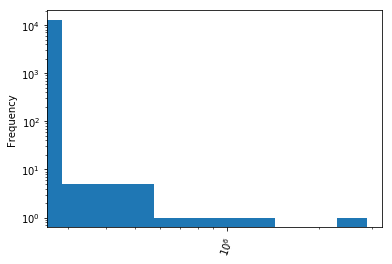

In [16]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of `0`. The plot shows us that there are barely any counts near the `max` value, signifying an outlier.

## 3.2 Visualizing multiple variables with boxplots
Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the `'initial_cost'` across the different values of the `'Borough'` column. The pandas `.boxplot()` method is a quick way to do this, in which you have to specify the `column` and `by` parameters. Here, you want to visualize how `'initial_cost'` varies _by_ `'Borough'`.

### Instructions:
* Using the `.boxplot()` method of `df`, create a boxplot of `'initial_cost'` across the different values of `'Borough'`.
* Display the plot.

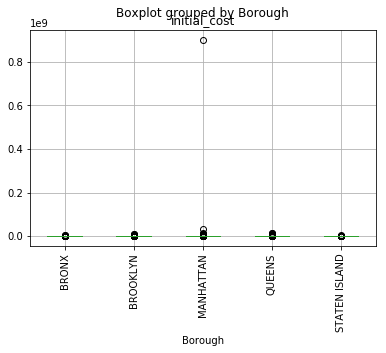

In [17]:
df['initial_cost'] = df['Initial Cost'].str[1:].astype(float)

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

You can see the 2 extreme outliers are in the borough of Manhattan. An initial guess could be that since land in Manhattan is extremely expensive, these outliers may be valid data points. Again, further investigation is needed to determine whether or not you can drop or keep those points in your data.

## 3.3 Visualizing multiple variables with scatter plots
Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

In this exercise, your job is to make a scatter plot with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. You can do this by using the DataFrame `.plot()` method with `kind='scatter'`. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, `df_subset`, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

### Instructions:
* Using `df`, create a scatter plot (`kind='scatter'`) with `'initial_cost'` on the x-axis and the `'total_est_fee'` on the y-axis. Rotate the x-axis labels by 70 degrees.
* Create another scatter plot exactly as above, substituting `df_subset` in place of `df`.

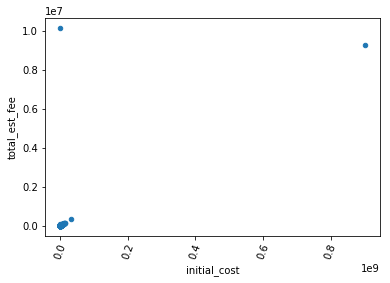

In [18]:
df['total_est_fee'] = df['Total Est. Fee'].str[1:].astype(float)

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

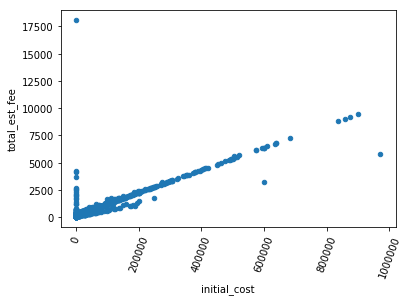

In [19]:
df_subset = df.loc[(df.initial_cost < 1000000) & (df.total_est_fee < 100000), :]

df_outliers = df.loc[(df.initial_cost > 1000000) & (df.total_est_fee > 100000), :]

df = df.sample(frac=0.1, random_state=42)

df = df.append(df_outliers)

df_subset = df_subset.sample(frac=0.1, random_state=42)

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

In general, from the second plot it seems like there is a strong correlation between `'initial_cost'` and `'total_est_fee'`. In addition, take note of the large number of points that have an `'initial_cost'` of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.